In [1]:
!date

Sat Nov 14 19:17:18 PST 2020


# Num Reads per cluster 

In [2]:
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import scanpy as sc
from scipy.stats import ks_2samp, ttest_ind
import ast
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings('ignore')

def nd(arr):
    return np.asarray(arr).reshape(-1)

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set(**{
        "aspect": "equal",
        "xlim": lims,
        "ylim": lims
    })
    return ax

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [3]:
isoform = anndata.read_h5ad("../../data/notebook/revision/no_filter_gene.h5ad")

In [8]:
nr = pd.read_csv("../../data/SMARTseq/fastqs/read_data.txt", header=None, sep="\t", index_col=0, names=["file", "nr"])

In [18]:
nr.index = nr.index.map(lambda x: x.split("_R1.")[0])

In [20]:
isoform.obs["nr"] = isoform.obs.cell_id.map(nr["nr"])

In [24]:
nr_sum = isoform.obs.groupby("cluster_label")["nr"].sum()
c_size = isoform.obs.groupby("cluster_label").count()

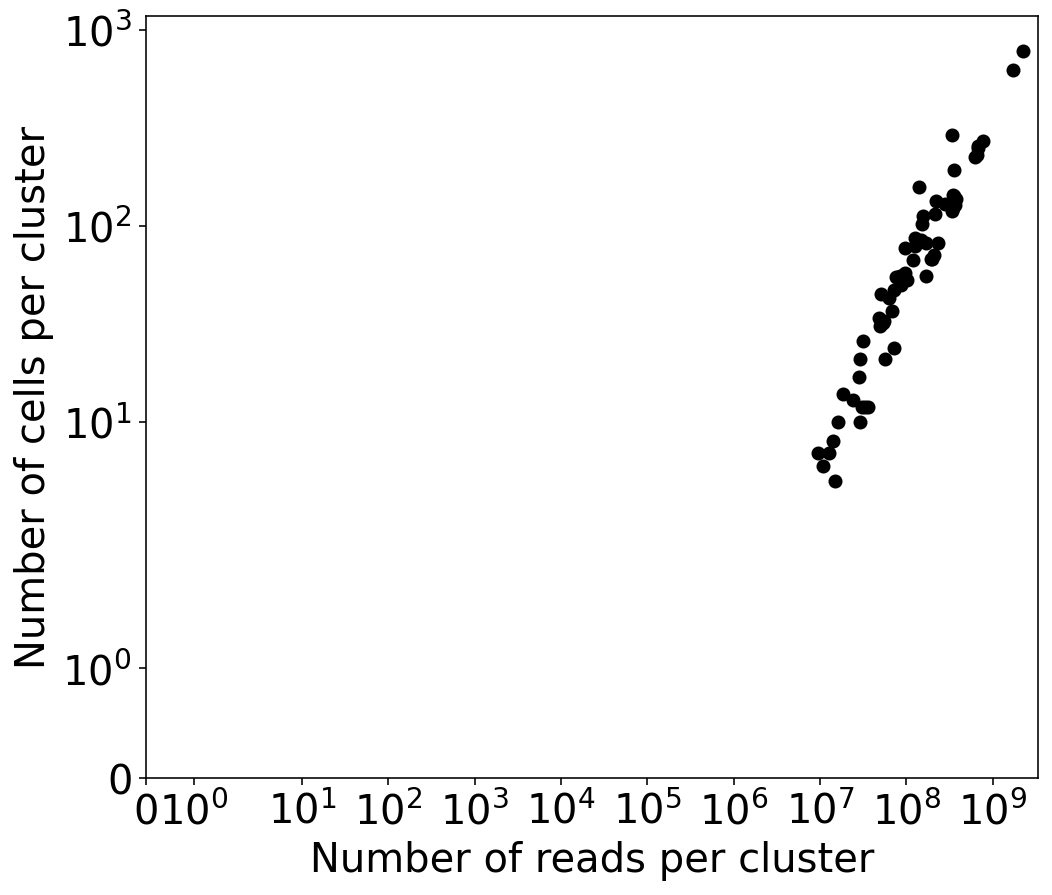

In [66]:
fig, ax = plt.subplots(figsize=(8,7))

x = nr_sum.values
y = c_size.cluster_id.values

ax.scatter(x,y, color="k")

ax.set(**{
    "xscale": "symlog",
    "yscale": "symlog",
    "xlim": (0, max(x)*1.5),
    "ylim": (0, max(y)*1.5),
    "xlabel": "Number of reads per cluster",
    "ylabel": "Number of cells per cluster"
})

fig.show()

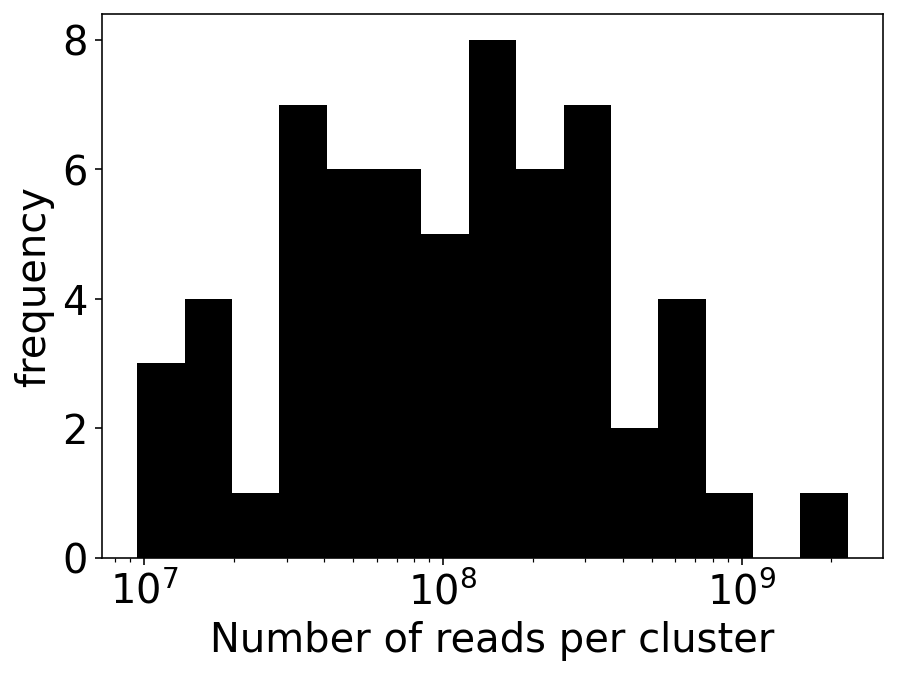

In [65]:
fig, ax = plt.subplots(figsize=(7,5))

x = nr_sum.values

MIN, MAX = np.min(x), np.max(x)

ax.hist(x, bins=10 ** np.linspace(np.log10(MIN), np.log10(MAX), 16), color="k")

ax.set(**{
    "xlabel": "Number of reads per cluster",
    "ylabel": "frequency",
    "xscale": "log"
})

fig.show()

In [61]:
np.sort(x)

array([   9499100,   10872281,   12581955,   14278403,   14880175,
         16114556,   18534573,   24399125,   28592386,   28706310,
         29217502,   30926182,   31764765,   33635024,   35898306,
         47926429,   49732595,   50280722,   53024216,   55766776,
         56726743,   62562299,   67508921,   72145573,   72300492,
         76690783,   84064578,   86895010,   96448771,   96972851,
        101766018,  117984150,  125967746,  126437949,  140945444,
        147625135,  152093355,  155875577,  169143919,  170441140,
        191469890,  200085091,  206724746,  215370475,  221104827,
        232338229,  284100597,  339962059,  341698381,  345874567,
        349515785,  352300380,  360945908,  369318849,  372990697,
        627696389,  654268759,  669497652,  683081230,  768845966,
       1741974836, 2264376507])

In [62]:
np.log10(9499100)

6.977682459652054